# 3. Nonparametric Methods 

In [495]:
import pandas as pd
import numpy as np 
import math 
import matplotlib.pyplot as plt 

## 3.1 
### Use the class with the largest number of occurrences for those K closest training samples to test sample as the prediction of this test sample.

In [497]:
poke = pd.read_csv('Pokemon.csv').iloc[ : , 1 :  ]
poke.iloc[ : , 2:] = poke.iloc[ : , 2 : ].apply(lambda x : (x-x.mean())/x.std())

In [498]:
train_poke = poke.iloc[ : 120, :]
test_poke = poke.iloc[120: , : ]

### 定義距離函數（拿掉了非數值的資料以及generation）

In [499]:
def eucl_dist(row1 , row2) : 
    a = np.array(row1.iloc[: , : ])  
    b = np.array(row2.iloc[: , : ])
    distance = np.sum((a-b) ** 2)
    return math.sqrt(distance)

In [500]:
eucl_dist(train_poke.iloc[1:2,2:], test_poke.iloc[3:4, 2:])

3.876190219017044

In [540]:
def takeSecond(elem):
    return elem[1]

def get_neighbors(train, test_flow, k) : 
    cal_a = list()
    for j in range(len(train)) : 
        a = eucl_dist(train.iloc[j:j+1,:], test_flow)
        cal_a.append((train_poke.loc[j, 'Type 1'] , a))
    cal_a.sort(key = takeSecond)
    return cal_a[ : k] 

def predict(train, test, k) : 
    pred = list()
    for i in range(len(test)) : 
        test_flow = test.iloc[i : i+1, : ]
        cal = get_neighbors(train, test_flow, k)
        output_values = [row[0] for row in cal]
        prediction = max(set(output_values), key=output_values.count)
        pred.append(prediction)
    return pred 
        
def predict_1(train, test, k) : 
    pred = list()
    for i in range(len(test)) : 
        test_flow = test.iloc[i : i+1, : ]
        cal = get_neighbors(train, test_flow, k)
        output_values = [row[0] for row in cal]
        prediction = max(set(output_values), key=output_values.count)
        category = set(poke.loc[ : , 'Type 1'])
        category.remove(prediction)
        check = list(category)
        a = output_values.count(check[0])
        b = output_values.count(check[1])
        k_new = k
        while a == output_values.count(prediction) or b == output_values.count(prediction) : 
            k_new -= 1
            cal = get_neighbors(train, test_flow, k_new)
            output_values = [row[0] for row in cal]
            prediction = max(set(output_values), key=output_values.count)
            category = set(poke.loc[ : , 'Type 1'])
            category.remove(prediction)
            check = list(category)
            a = output_values.count(check[0])
            b = output_values.count(check[1])
            print(k_new)
        else : 
            pred.append(prediction)
    return pred 

In [504]:
correct = list()
for i in range(1,11) : 
    table = pd.DataFrame(predict(train_poke.iloc[:, 2:], test_poke.iloc[:, 2:], i), index = None)
    table = pd.concat([test_poke.iloc[:, 1:2].reset_index(drop = True),table], ignore_index= True, axis= 1)
    table['correct'] = np.where(table[0] == table[1], 1,0)
    a = table['correct'].sum() / 38
    correct.append(a)

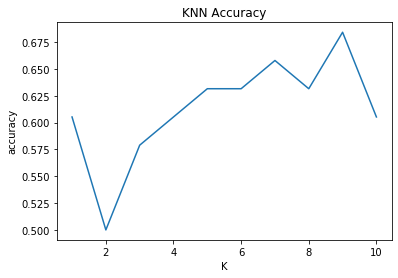

In [505]:
plt.title('KNN Accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.plot(range(1,11),correct)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
3
3
3
3
3
3
3
3
3
3
4
4
3
4
4
3
4
4
3
4
5
5
4
5
4
3
5
5
6
5
6
6
7
7
7
7
6
7
7
8
8
7
8
8
7
9
9
9
9
8
7


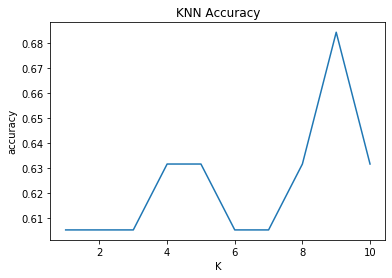

In [506]:
correct = list()
for i in range(1,11) : 
    table = pd.DataFrame(predict_1(train_poke.iloc[:, 2:], test_poke.iloc[:, 2:], i), index = None)
    table = pd.concat([test_poke.iloc[:, 1:2].reset_index(drop = True),table], ignore_index= True, axis= 1)
    table['correct'] = np.where(table[0] == table[1], 1,0)
    a = table['correct'].sum() / 38
    correct.append(a)
plt.title('KNN Accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.plot(range(1,11),correct)

# 3.2 KNN with PCA 

In [541]:
train_poke_pca = train_poke.iloc[ :, 2: ]
test_poke_pca = test_poke.iloc[ : , 2: ]
cov_poke = np.cov(train_poke_pca.T)


In [542]:
eig_val_poke, eig_vec_poke = np.linalg.eig(cov_poke)

In [543]:
eig_pairs_poke = [(np.abs(eig_val_poke[i]), eig_vec_poke[:,i]) for i in range(len(eig_val_poke))]
eig_pairs_poke.sort(key=lambda x: x[0], reverse=True)

In [544]:
def eigenvector(eig_pairs, d) : 
    w_pca = np.array([])
    for i in range(d) : 
        print(eig_pairs[i][0])
        w_pca = np.append(w_pca,eig_pairs[i][1])
    w_pca = np.array(w_pca.reshape(d, -1).T, dtype = 'float32')
    return w_pca

### D = 7

In [552]:
poke_pca = eigenvector(eig_pairs_poke,7)

4.0350371714807
1.3724669006330599
1.0008859850076175
0.8833367493344931
0.6126682788417983
0.5420393223806452
0.4759986135339845


### 將train和test透過我們找出的pca降維

In [553]:
train_pca = train_poke_pca @ poke_pca
test_pca = test_poke_pca @ poke_pca

In [554]:
correct_pca = list()
for i in range(1,11) : 
    table = pd.DataFrame(predict(train_pca, test_pca, i), index = None)
    table = pd.concat([test_poke.iloc[:, 1:2].reset_index(drop = True),table], ignore_index= True, axis= 1)
    table['correct'] = np.where(table[0] == table[1], 1,0)
    a = table['correct'].sum() / 38
    correct_pca.append(a)

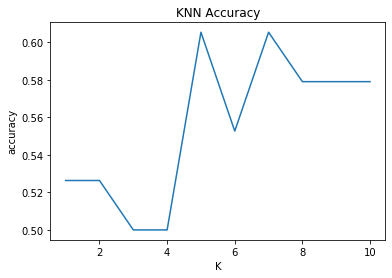

In [555]:
plt.title('KNN Accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.plot(range(1,11),correct_pca)

### D = 6 

In [556]:
poke_pca = eigenvector(eig_pairs_poke,6)

4.0350371714807
1.3724669006330599
1.0008859850076175
0.8833367493344931
0.6126682788417983
0.5420393223806452


In [557]:
train_pca = train_poke_pca @ poke_pca
test_pca = test_poke_pca @ poke_pca

In [558]:
correct_pca = list()
for i in range(1,11) : 
    table = pd.DataFrame(predict(train_pca, test_pca, i), index = None)
    table = pd.concat([test_poke.iloc[:, 1:2].reset_index(drop = True),table], ignore_index= True, axis= 1)
    table['correct'] = np.where(table[0] == table[1], 1,0)
    a = table['correct'].sum() / 38
    correct_pca.append(a)

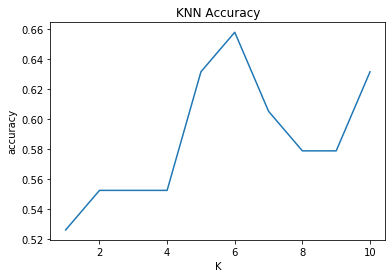

In [559]:
plt.title('KNN Accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.plot(range(1,11),correct_pca)

### D = 5 

In [560]:
poke_pca = eigenvector(eig_pairs_poke,5)

4.0350371714807
1.3724669006330599
1.0008859850076175
0.8833367493344931
0.6126682788417983


In [561]:
train_pca = train_poke_pca @ poke_pca
test_pca = test_poke_pca @ poke_pca

In [562]:
correct_pca = list()
for i in range(1,11) : 
    table = pd.DataFrame(predict(train_pca, test_pca, i), index = None)
    table = pd.concat([test_poke.iloc[:, 1:2].reset_index(drop = True),table], ignore_index= True, axis= 1)
    table['correct'] = np.where(table[0] == table[1], 1,0)
    a = table['correct'].sum() / 38
    correct_pca.append(a)

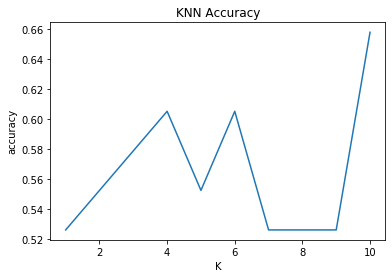

In [563]:
plt.title('KNN Accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.plot(range(1,11),correct_pca)